<a href="https://colab.research.google.com/github/quuyynh/DSA-460-Final-Project/blob/main/mushrooms_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mushroom Classification Project - Exploratory Analysis and Preprocessing**

This Google Colab notebook is a shared collaborative document between:

* Quynh Tran [2777918]
* MariaFaye Palma [2839064]

**Project**: Predicting Mushroom Edibility (Edible vs Poisonous)  
**Course**: DSA 460, Spring 2025

**Notes:** This document includes code, analysis, and commentary contributed by both group members.

**In this step, features are split evenly to work on: **

* **Maria is responsible for:**
    1. cap-shape
    2. cap-surface
    3. cap-color
    4. bruises?
    5. odor
    6. gill-attachment
    7. gill-spacing
    8. gill-size
    9. gill-color
    10. stalk-shape
    11. stalk-root

* **Quynh is responsible for:**
    1. stalk-surface-above-ring
    2. stalk-surface-below-ring
    3. stalk-color-above-ring
    4. stalk-color-below-ring
    5. habitat
    6. veil-type
    7. veil-color
    8. ring-number
    9. ring-type
    10. spore-print-color
    11. population

# **1. Import all necessary visualization libraries and load into dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

## Confirm successful load in of dataset

In [ ]:
file_path = '/content/agaricus-lepiota.data'
df = pd.read_csv(file_path)
print (df.head())

   p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0  e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1  e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2  p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3  e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4  e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g

[5 rows x 23 columns]


Since, the data is not in the ideal clean format that we want it to be in, also it's missing column names, we will have to reformat it.

According to the notes that were provided by the Audubon Society Field Guide, the columns are in order of how they are described in the notes...

1. Class - edible or poisonous
2. cap-shape
3. cap-surface
4. cap-color
5. bruises?
6. odor
7. gill-attachment
8. gill-spacing
9. gill-size
10. gill-color
11. stalk-shape
12. stalk-root
13. stalk-surface-above-ring
14. stalk-surface-below-ring
15. stalk-color-above-ring
16. stalk-color-below-ring
17. habitat
18. veil-type
19. veil-color
20. ring-number
21. ring-type
22. spore-print-color
23. population

**Knowing that, we do not rearrange the data, but just add column headers and change the records from having a single letter representing data to the actual name of the attributes (i.e. cap-shape -> 'b' is then changed to 'bell')**

In [ ]:
# Assign column names from the .names file
df.columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

# Dictionary of letter-to-name mappings
mappings = {
    "class": {'e': 'edible', 'p': 'poisonous'},
    "cap-shape": {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    "cap-surface": {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    "cap-color": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "bruises": {'t': 'bruises', 'f': 'no'},
    "odor": {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    "gill-attachment": {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    "gill-spacing": {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    "gill-size": {'b': 'broad', 'n': 'narrow'},
    "gill-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-shape": {'e': 'enlarging', 't': 'tapering'},
    "stalk-root": {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    "stalk-surface-above-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-surface-below-ring": {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    "stalk-color-above-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "stalk-color-below-ring": {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    "veil-type": {'p': 'partial', 'u': 'universal'},
    "veil-color": {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    "ring-number": {'n': 'none', 'o': 'one', 't': 'two'},
    "ring-type": {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    "spore-print-color": {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    "population": {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    "habitat": {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

# Apply mapping to each column
for col, mapping in mappings.items():
    df[col] = df[col].replace(mapping)

print(df.head())

# Save to CSV
df.to_csv("mushrooms_named.csv", index=False)
print("Saved as mushrooms_named.csv")


       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

# **2. Inspect Data**

In [ ]:
df.shape

(8124, 23)

In [ ]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

There are no null or missing values

In [ ]:
nan = df.isnull()
print(nan.mean() * 100)

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64


To confirm, we'll print out the unique values of each column

In [ ]:
for col in df.columns:
    print(f"🔹 Column: {col}")
    print(df[col].unique())
    print("-" * 40)

🔹 Column: class
['poisonous' 'edible']
----------------------------------------
🔹 Column: cap-shape
['convex' 'bell' 'sunken' 'flat' 'knobbed' 'conical']
----------------------------------------
🔹 Column: cap-surface
['smooth' 'scaly' 'fibrous' 'grooves']
----------------------------------------
🔹 Column: cap-color
['brown' 'yellow' 'white' 'gray' 'red' 'pink' 'buff' 'purple' 'cinnamon'
 'green']
----------------------------------------
🔹 Column: bruises
['bruises' 'no']
----------------------------------------
🔹 Column: odor
['pungent' 'almond' 'anise' 'none' 'foul' 'creosote' 'fishy' 'spicy'
 'musty']
----------------------------------------
🔹 Column: gill-attachment
['free' 'attached']
----------------------------------------
🔹 Column: gill-spacing
['close' 'crowded']
----------------------------------------
🔹 Column: gill-size
['narrow' 'broad']
----------------------------------------
🔹 Column: gill-color
['black' 'brown' 'gray' 'pink' 'white' 'chocolate' 'purple' 'red' 'buff'
 'g

# **3. Exploratory Analysis**


## Data Visualizaton

### Class/Target Distribution

<ipython-input-12-6923f8f93760>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


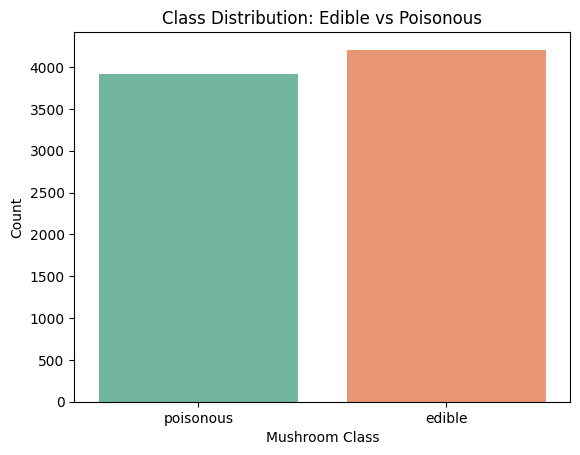

In [ ]:
sns.countplot(x='class', data=df, palette='Set2')
plt.title("Class Distribution: Edible vs Poisonous")
plt.xlabel("Mushroom Class")
plt.ylabel("Count")
plt.show()

### cap-color

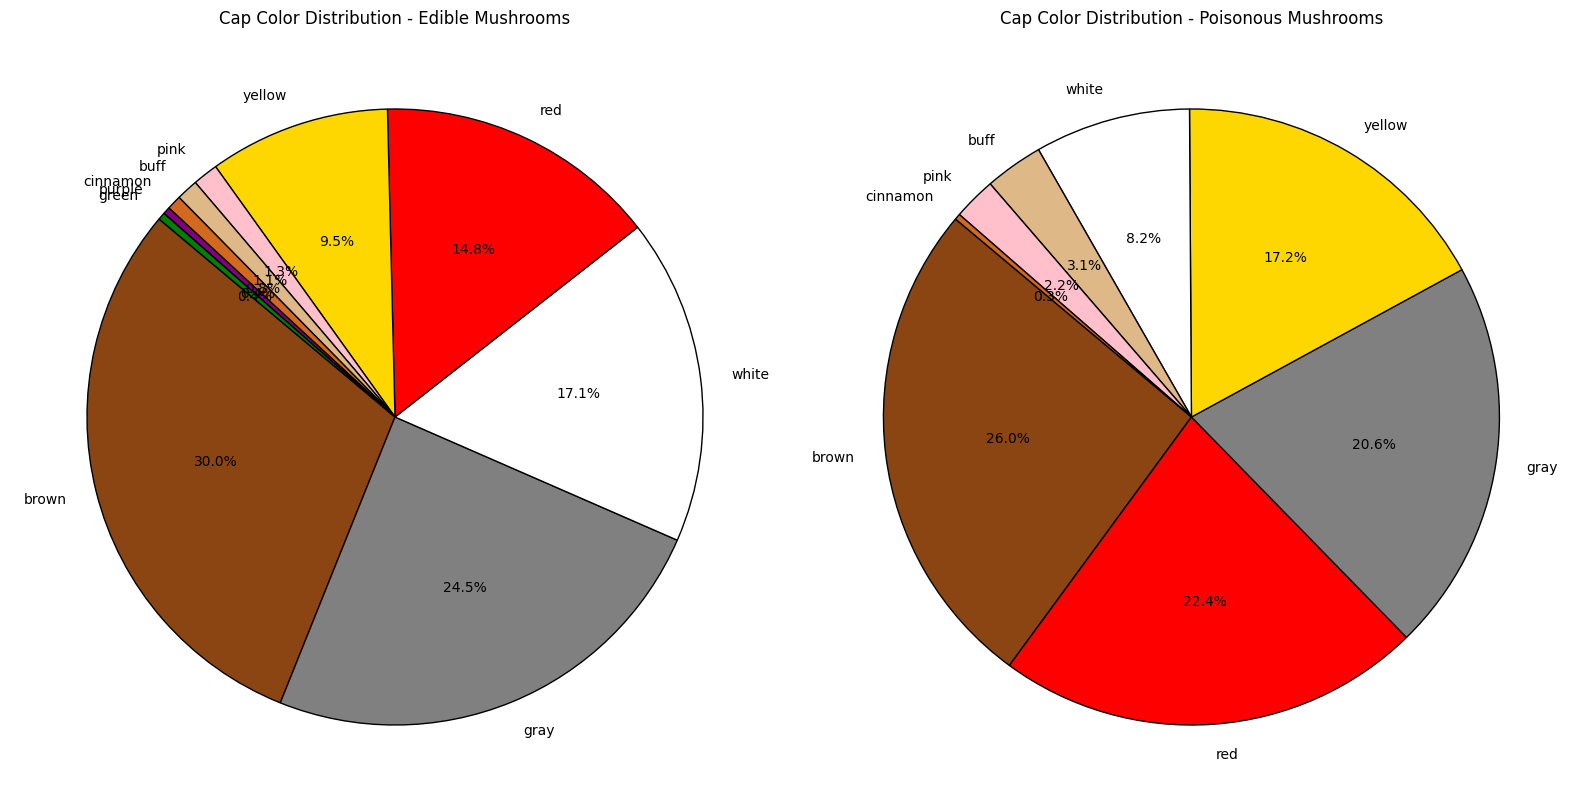

In [ ]:
edible_df = df[df['class'] == 'edible']
poisonous_df = df[df['class'] == 'poisonous']

# Count cap-color values for each class
edible_colors = edible_df['cap-color'].value_counts()
poisonous_colors = poisonous_df['cap-color'].value_counts()

color_map = {
    'brown': 'saddlebrown',
    'buff': 'burlywood',
    'cinnamon': 'chocolate',
    'gray': 'gray',
    'green': 'green',
    'pink': 'pink',
    'purple': 'purple',
    'red': 'red',
    'white': 'white',
    'yellow': 'gold'
}

# Generate color lists for the pie charts based on order of labels
edible_colors_mpl = [color_map[color] for color in edible_colors.index]
poisonous_colors_mpl = [color_map[color] for color in poisonous_colors.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(edible_colors, labels=edible_colors.index, colors=edible_colors_mpl, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Cap Color Distribution - Edible Mushrooms")

axes[1].pie(poisonous_colors, labels=poisonous_colors.index, colors=poisonous_colors_mpl, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Cap Color Distribution - Poisonous Mushrooms")

plt.tight_layout()
plt.show()

### cap-shape

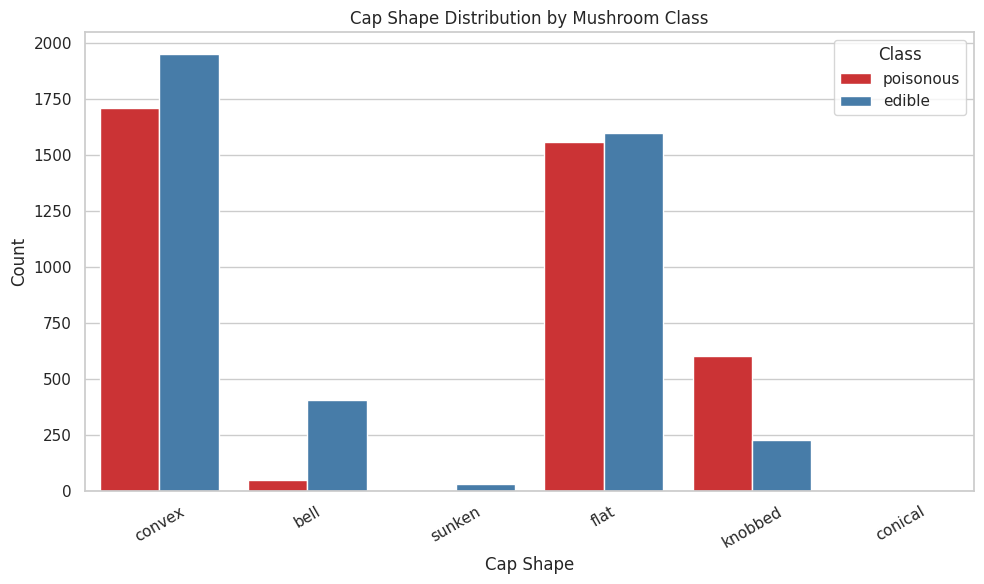

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='cap-shape', hue='class', palette='Set1')

plt.title("Cap Shape Distribution by Mushroom Class")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### cap-surface

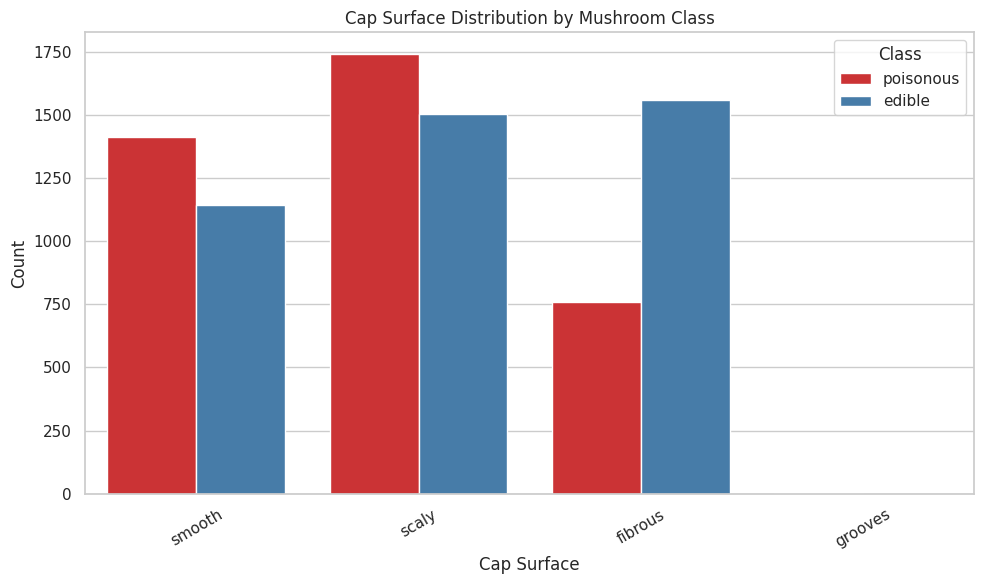

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='cap-surface', hue='class', palette='Set1')

plt.title("Cap Surface Distribution by Mushroom Class")
plt.xlabel("Cap Surface")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### bruises?

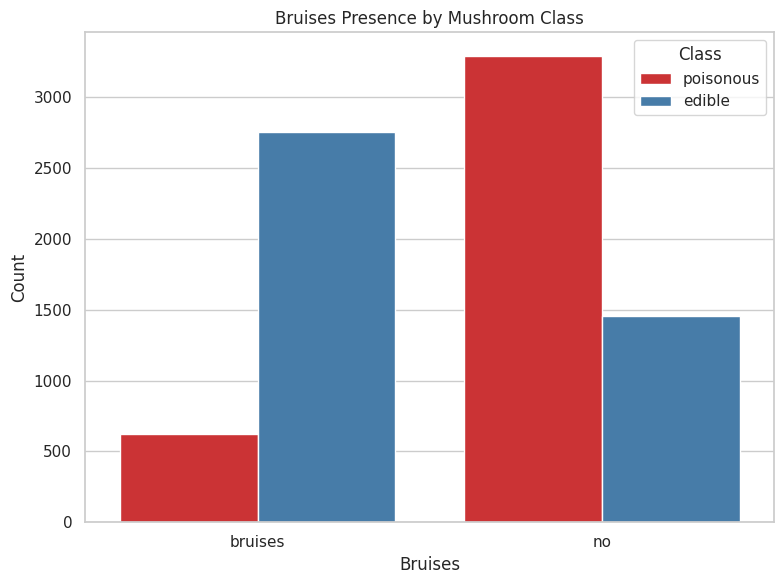

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='bruises', hue='class', palette='Set1')

plt.title("Bruises Presence by Mushroom Class")
plt.xlabel("Bruises")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

### odor

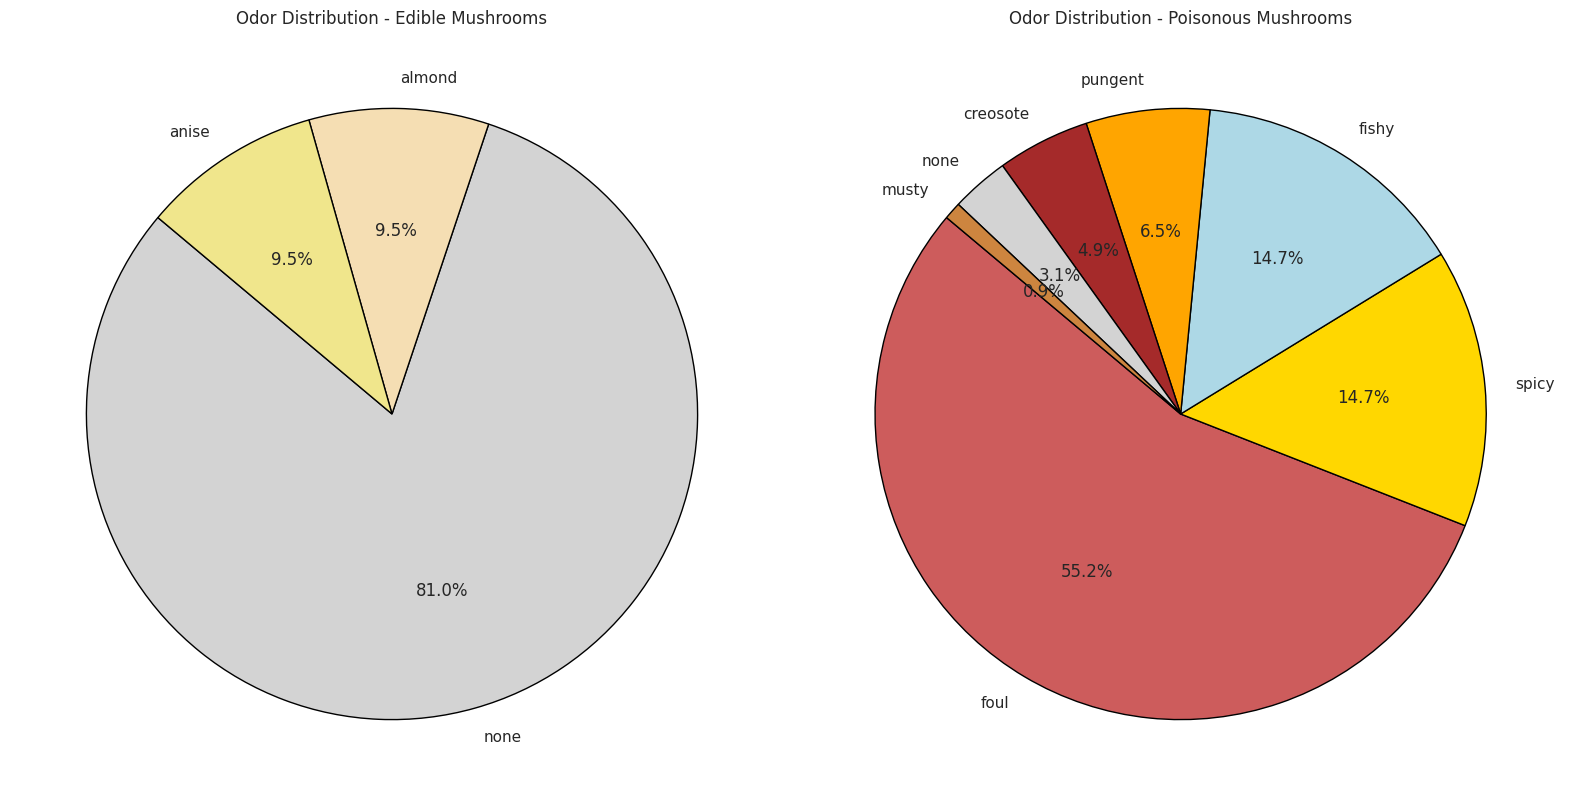

In [ ]:
oder_edible = df[df['class'] == 'edible']['odor'].value_counts()
oder_poisonous = df[df['class'] == 'poisonous']['odor'].value_counts()

odor_color_map = {
    'none': 'lightgray', 'almond': 'wheat', 'anise': 'khaki',
    'creosote': 'brown', 'fishy': 'lightblue', 'foul': 'indianred',
    'musty': 'peru', 'pungent': 'orange', 'spicy': 'gold'
}

oder_edible_colors = [odor_color_map[color] for color in oder_edible.index]
oder_poisonous_colors = [odor_color_map[color] for color in oder_poisonous.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(oder_edible, labels=oder_edible.index, colors=oder_edible_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Odor Distribution - Edible Mushrooms")

axes[1].pie(oder_poisonous, labels=oder_poisonous.index, colors=oder_poisonous_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Odor Distribution - Poisonous Mushrooms")

plt.tight_layout()
plt.show()

### gill-attachment

(sample contains only 2 of features instead of 4)



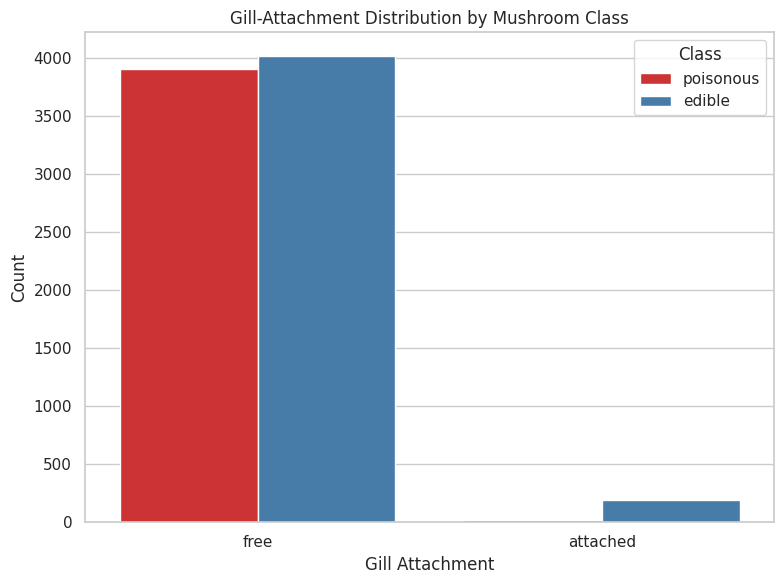

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='gill-attachment', hue='class', palette='Set1')

plt.title("Gill-Attachment Distribution by Mushroom Class")
plt.xlabel("Gill Attachment")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

### gill-spacing

(sample contains only 2 of features instead of 3)
- distant feature was not found

In [ ]:
df['gill-spacing'].unique()

array(['close', 'crowded'], dtype=object)

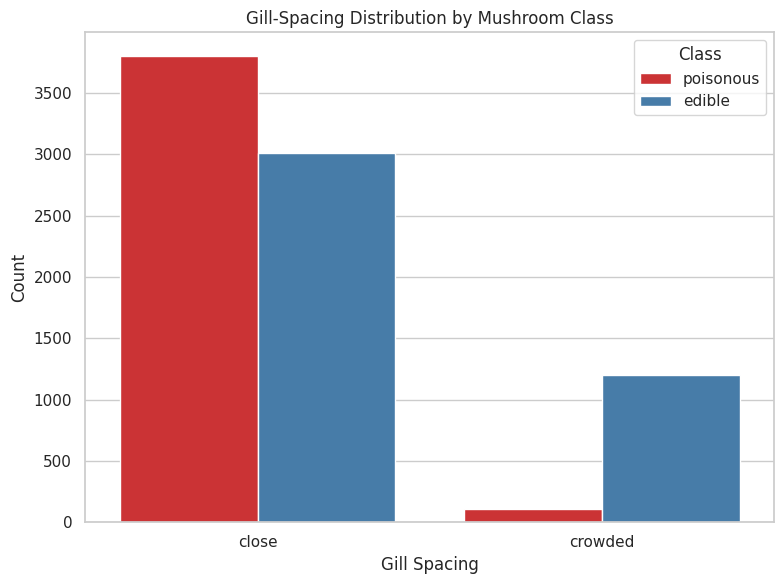

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='gill-spacing', hue='class', palette='Set1')

plt.title("Gill-Spacing Distribution by Mushroom Class")
plt.xlabel("Gill Spacing")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### gill-size


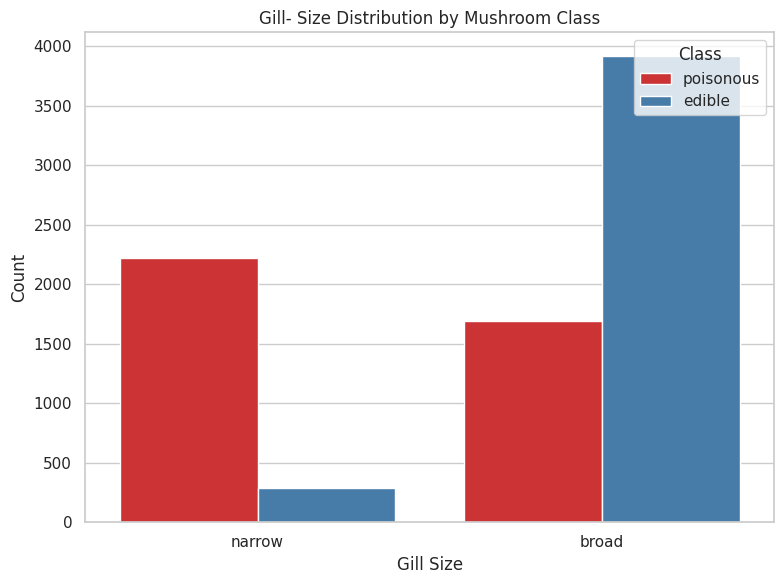

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='gill-size', hue='class', palette='Set1')

plt.title("Gill- Size Distribution by Mushroom Class")
plt.xlabel("Gill Size")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### gill-color

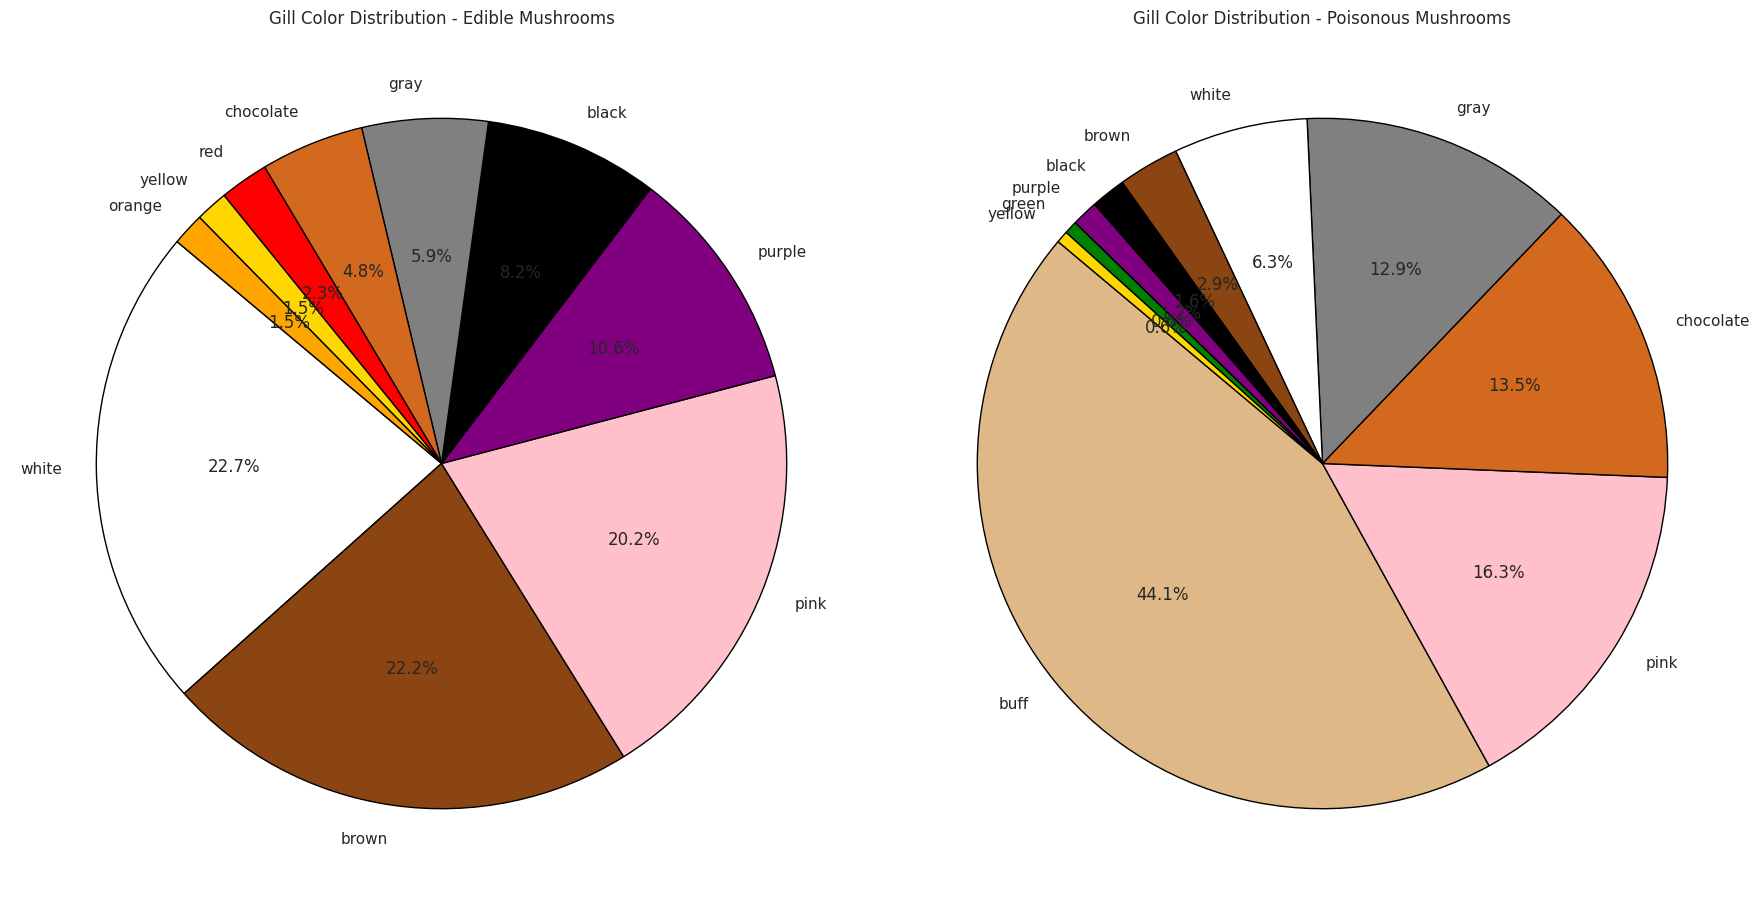

In [ ]:
gill_edible = df[df['class'] == 'edible']['gill-color'].value_counts()
gill_poisonous = df[df['class'] == 'poisonous']['gill-color'].value_counts()

# Color map for gill colors
gill_color_map = {
    'black': 'black',
    'brown': 'saddlebrown',
    'buff': 'burlywood',
    'chocolate': 'chocolate',
    'gray': 'gray',
    'green': 'green',
    'orange': 'orange',
    'pink': 'pink',
    'purple': 'purple',
    'red': 'red',
    'white': 'white',
    'yellow': 'gold'
}


colors_poisonous = [gill_color_map[c] for c in gill_poisonous.index]

fig, axes = plt.subplots(1, 2, figsize=(18, 9))

axes[0].pie(gill_edible, labels=gill_edible.index, colors=colors_edible,
            autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Gill Color Distribution - Edible Mushrooms")

axes[1].pie(gill_poisonous, labels=gill_poisonous.index, colors=colors_poisonous,
            autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Gill Color Distribution - Poisonous Mushrooms")

plt.tight_layout()
plt.show()

### stalk-shape

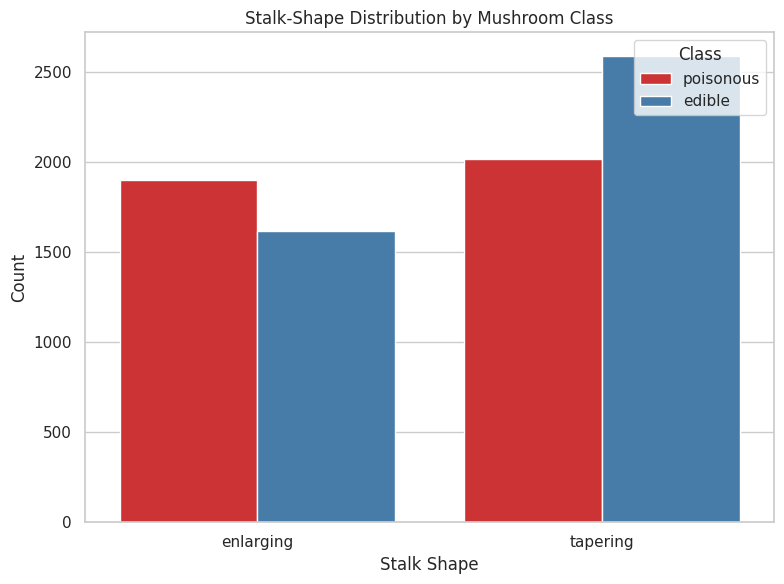

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-shape', hue='class', palette='Set1')

plt.title("Stalk-Shape Distribution by Mushroom Class")
plt.xlabel("Stalk Shape")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### stalk-root

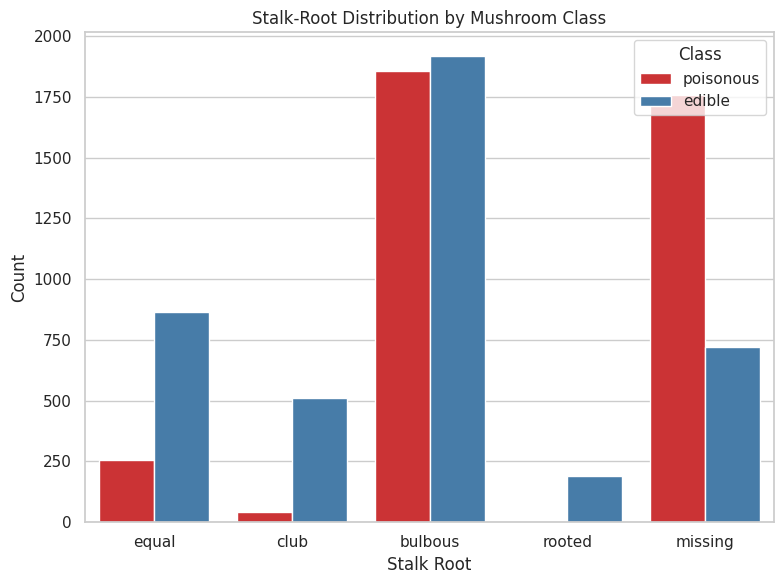

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-root', hue='class', palette='Set1')

plt.title("Stalk-Root Distribution by Mushroom Class")
plt.xlabel("Stalk Root")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### stalk-surface-above-ring

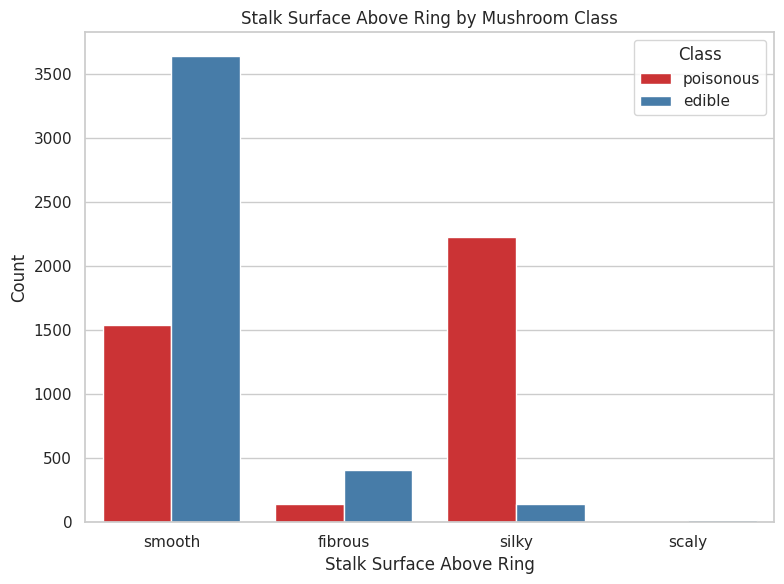

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-surface-above-ring', hue='class', palette='Set1')

plt.title("Stalk Surface Above Ring by Mushroom Class")
plt.xlabel("Stalk Surface Above Ring")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### stalk-surface-below-ring

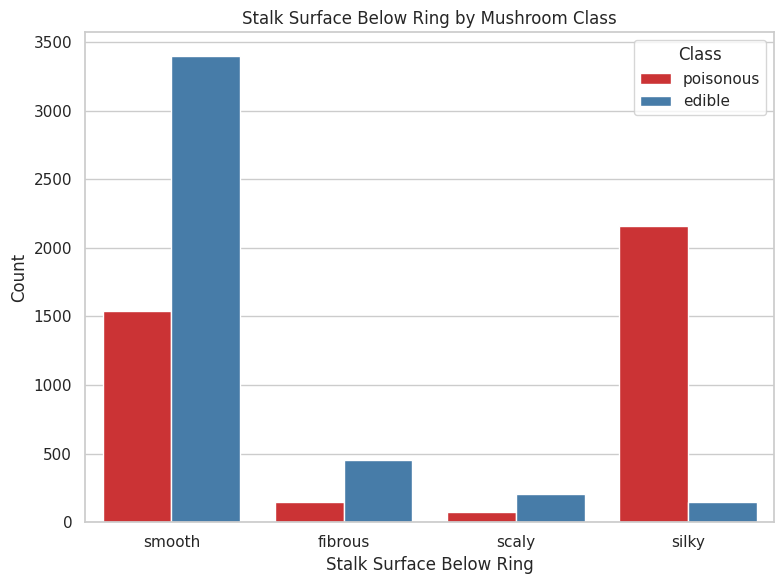

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-surface-below-ring', hue='class', palette='Set1')

plt.title("Stalk Surface Below Ring by Mushroom Class")
plt.xlabel("Stalk Surface Below Ring")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### stalk-color-above-ring

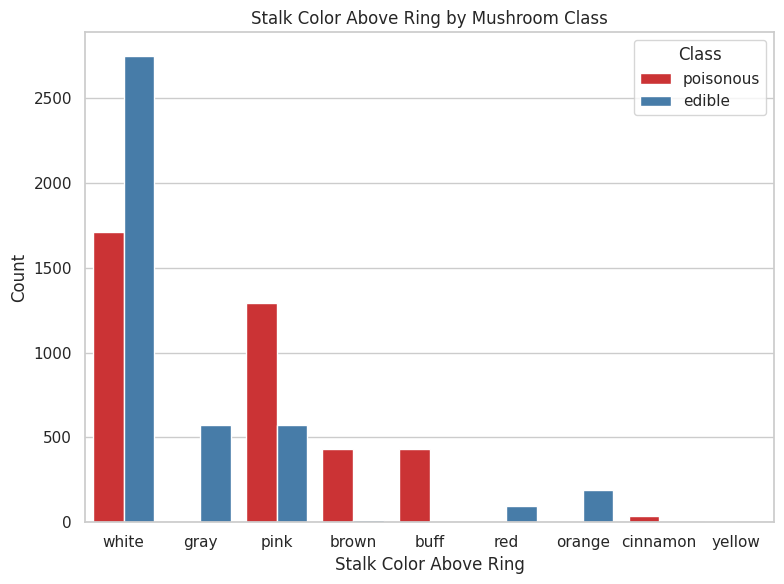

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-color-above-ring', hue='class', palette='Set1')

plt.title("Stalk Color Above Ring by Mushroom Class")
plt.xlabel("Stalk Color Above Ring")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### stalk-color-below-ring

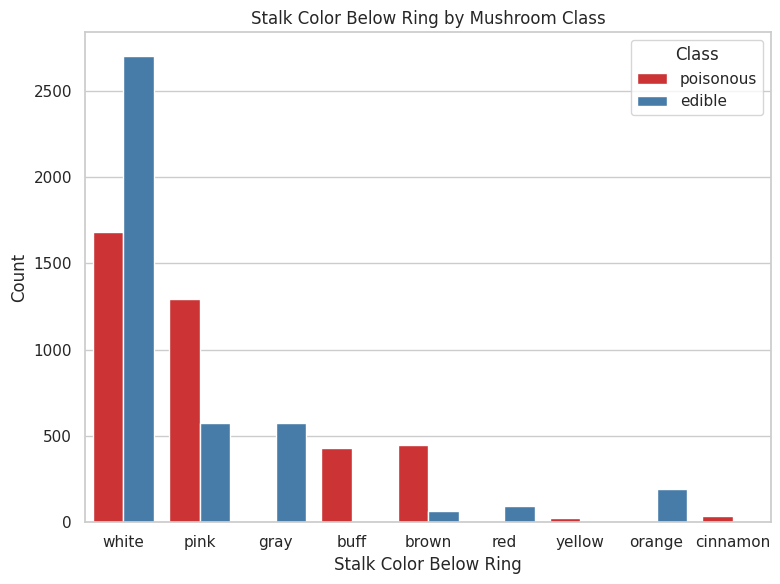

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='stalk-color-below-ring', hue='class', palette='Set1')

plt.title("Stalk Color Below Ring by Mushroom Class")
plt.xlabel("Stalk Color Below Ring")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### habitat

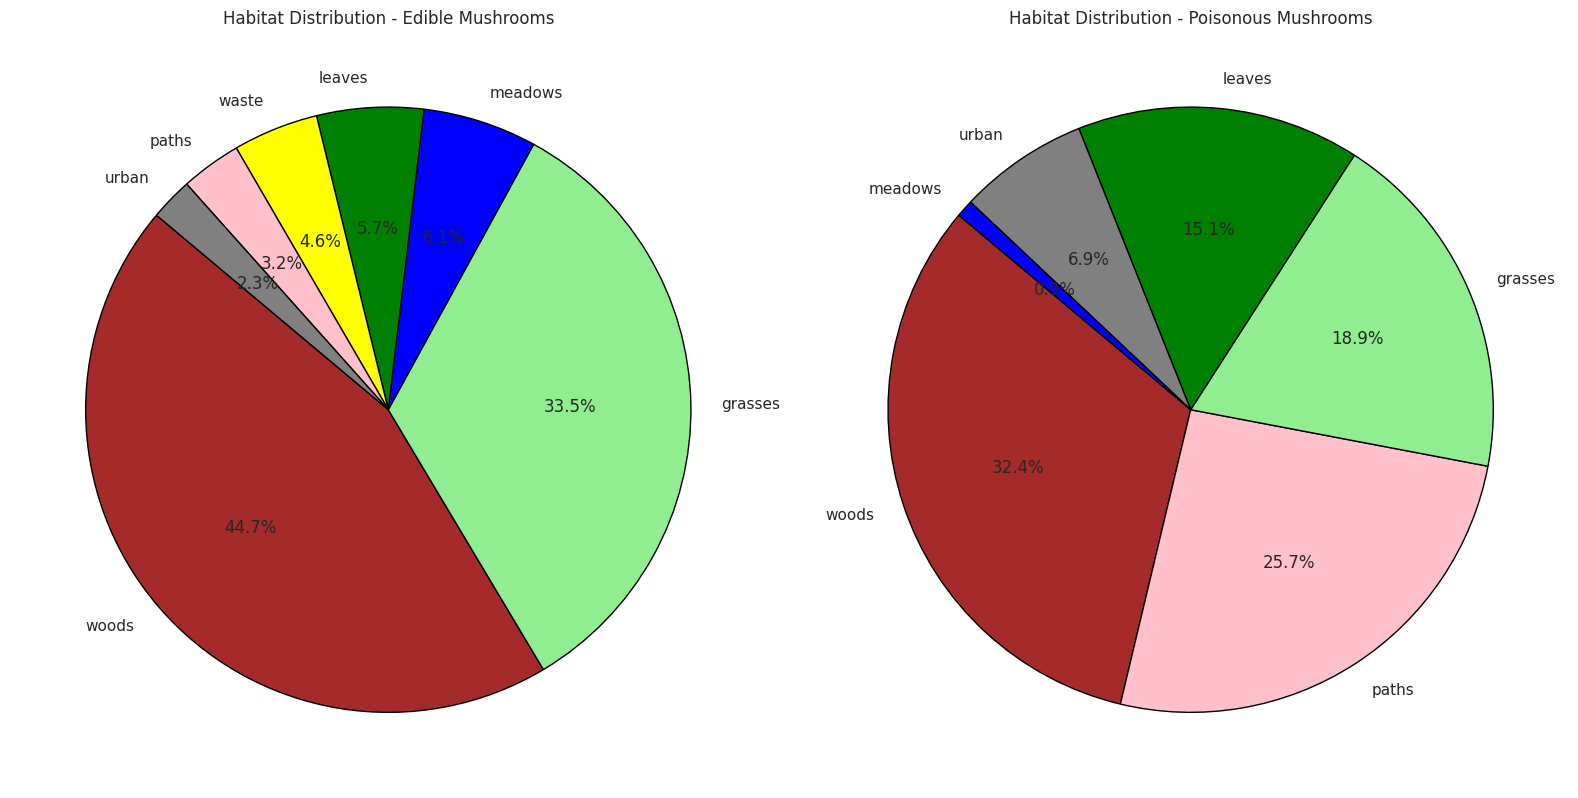

In [ ]:
habitat_edible = df[df['class'] == 'edible']['habitat'].value_counts()
habitat_poisonous = df[df['class'] == 'poisonous']['habitat'].value_counts()

habitat_color_map = {
    'grasses': 'lightgreen', 'leaves': 'green', 'meadows': 'blue',
    'paths': 'pink', 'urban': 'gray', 'waste': 'yellow',
    'woods': 'brown'
}

habitat_edible_colors = [habitat_color_map[color] for color in habitat_edible.index]
habitat_poisonous_colors = [habitat_color_map[color] for color in habitat_poisonous.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(habitat_edible, labels=habitat_edible.index, colors=habitat_edible_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Habitat Distribution - Edible Mushrooms")

axes[1].pie(habitat_poisonous, labels=habitat_poisonous.index, colors=habitat_poisonous_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Habitat Distribution - Poisonous Mushrooms")

plt.tight_layout()
plt.show()

### veil-type

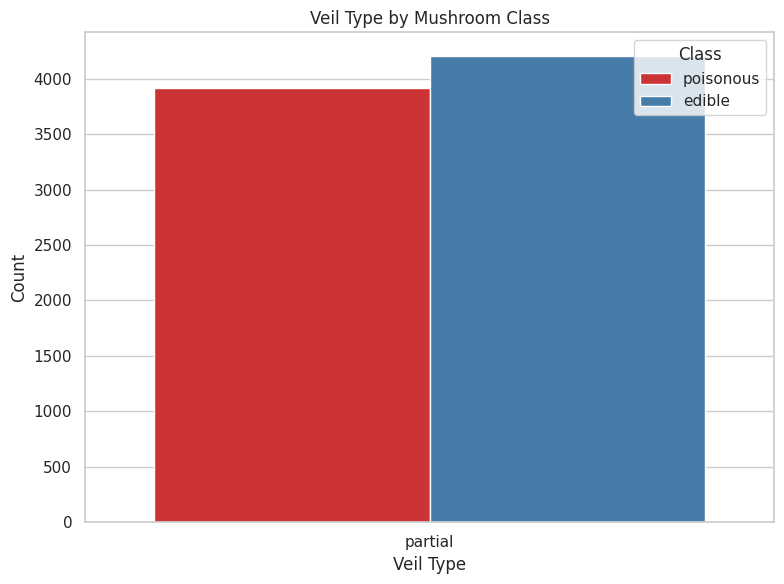

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='veil-type', hue='class', palette='Set1')

plt.title("Veil Type by Mushroom Class")
plt.xlabel("Veil Type")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

In this sample (dataset), there are no 'universal' veil type, just partial.

### veil-color

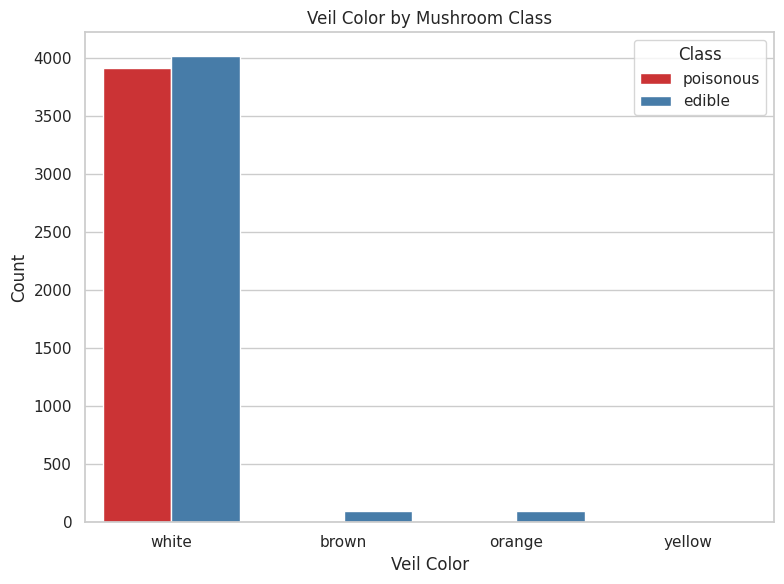

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='veil-color', hue='class', palette='Set1')

plt.title("Veil Color by Mushroom Class")
plt.xlabel("Veil Color")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### ring-number

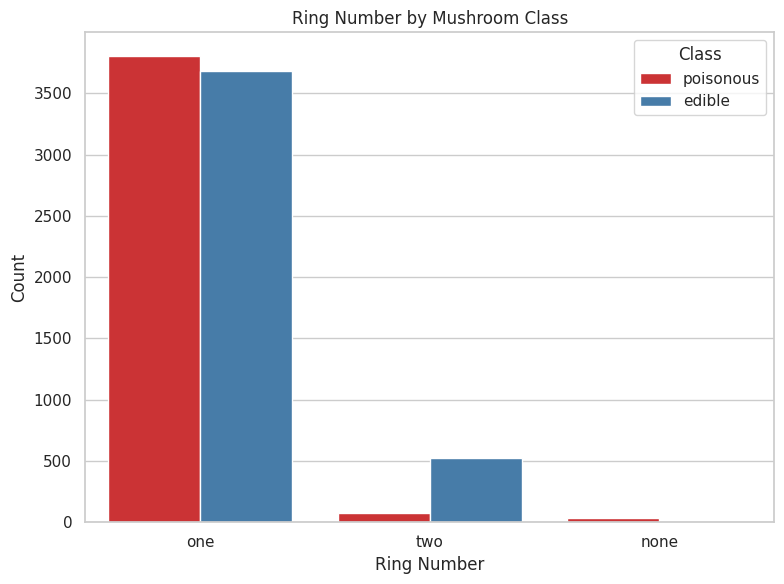

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='ring-number', hue='class', palette='Set1')

plt.title("Ring Number by Mushroom Class")
plt.xlabel("Ring Number")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

### ring-type

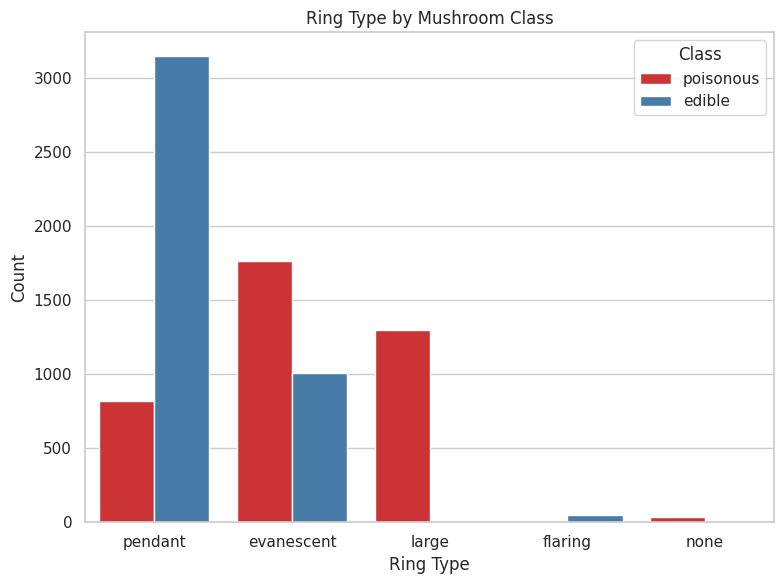

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='ring-type', hue='class', palette='Set1')

plt.title("Ring Type by Mushroom Class")
plt.xlabel("Ring Type")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

This sample contains no mushrooms with ring type cobwebby, sheathing, and zone

### spore-print-color

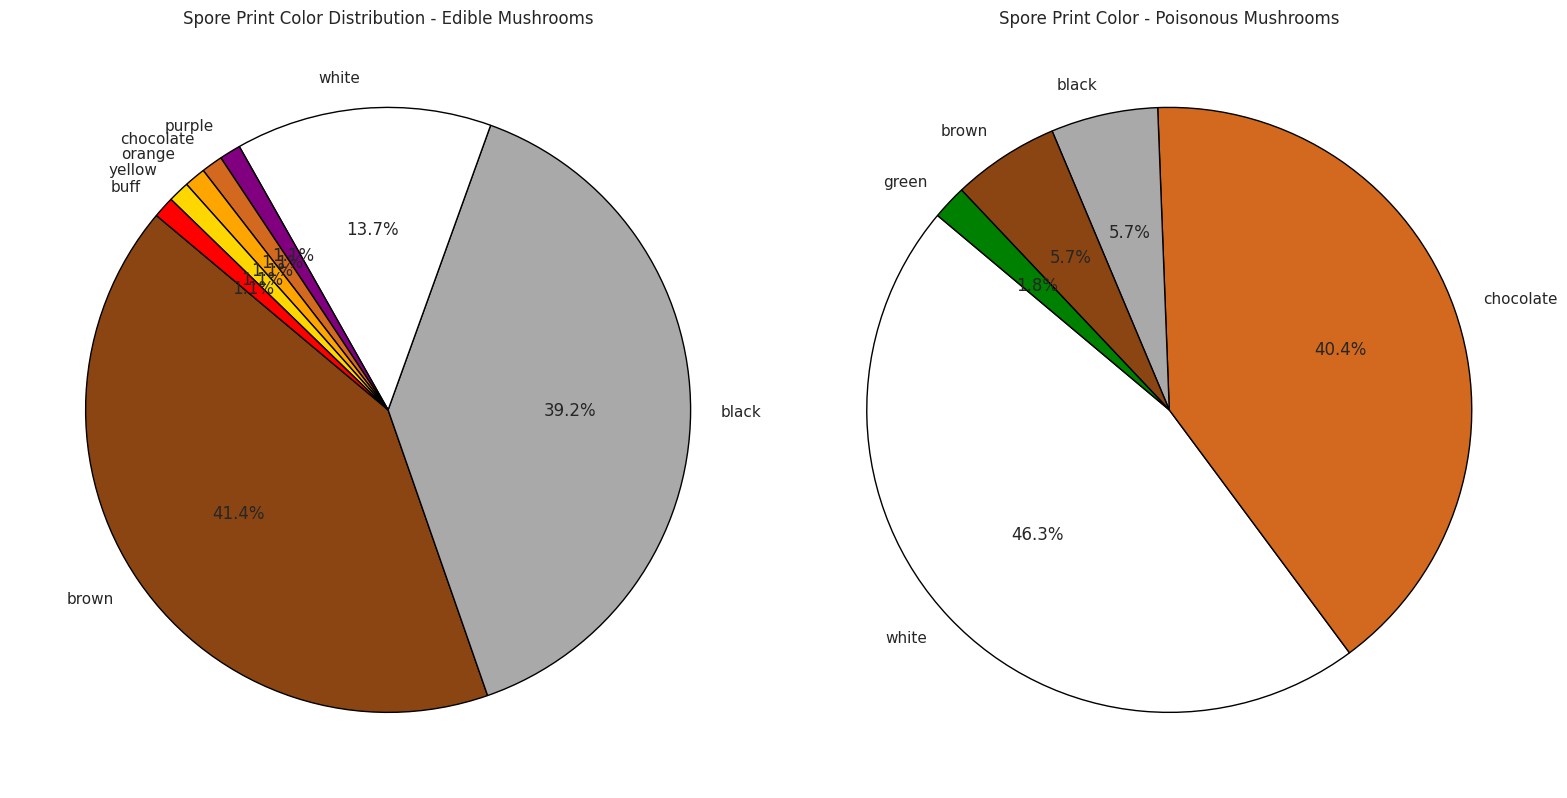

In [ ]:
sporeprint_edible = df[df['class'] == 'edible']['spore-print-color'].value_counts()
sporeprint_poisonous = df[df['class'] == 'poisonous']['spore-print-color'].value_counts()

sporeprint_color_map = {
    'black': 'darkgray',
    'brown': 'saddlebrown',
    'buff': 'red',
    'chocolate': 'chocolate',
    'green': 'green',
    'orange': 'orange',
    'purple': 'purple',
    'white': 'white',
    'yellow': 'gold'
}

sporeprint_edible_colors = [sporeprint_color_map[color] for color in sporeprint_edible.index]
sporeprint_poisonous_colors = [sporeprint_color_map[color] for color in sporeprint_poisonous.index]

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].pie(sporeprint_edible, labels=sporeprint_edible.index, colors=sporeprint_edible_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[0].set_title("Spore Print Color Distribution - Edible Mushrooms")

axes[1].pie(sporeprint_poisonous, labels=sporeprint_poisonous.index, colors=sporeprint_poisonous_colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
axes[1].set_title("Spore Print Color - Poisonous Mushrooms")

plt.tight_layout()
plt.show()

### population

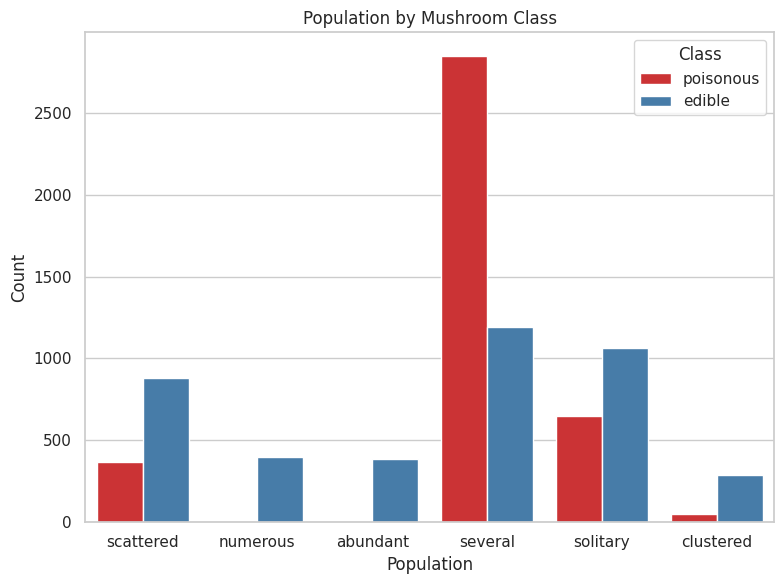

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sns.countplot(data=df, x='population', hue='class', palette='Set1')

plt.title("Population by Mushroom Class")
plt.xlabel("Population")
plt.ylabel("Count")
plt.legend(title='Class', loc='upper right')

plt.tight_layout()
plt.show()

## Statistics

Based on the exploratory analysis we did, the best features we think should be included in the model are:
1. stalk-surface-above-ring
2. stalk-surface-below-ring
3. gill=size
4. odor
5. bruises
6. habitat
7. ring type
8. spore-print-type
9. population

maybe...
* gill-attachment
* gill-spacing
* stalk-color-above/below-ring

In [ ]:
# narrow down data
features_to_check = [
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'gill-size',
    'odor', 'bruises', 'habitat', 'ring-type', 'spore-print-color', 'population',
    'gill-attachment', 'gill-spacing', 'stalk-color-above-ring', 'stalk-color-below-ring'
]

for col in features_to_check:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: stalk-surface-above-ring
stalk-surface-above-ring
smooth     5176
silky      2372
fibrous     552
scaly        24
Name: count, dtype: int64

Column: stalk-surface-below-ring
stalk-surface-below-ring
smooth     4936
silky      2304
fibrous     600
scaly       284
Name: count, dtype: int64

Column: gill-size
gill-size
broad     5612
narrow    2512
Name: count, dtype: int64

Column: odor
odor
none        3528
foul        2160
spicy        576
fishy        576
almond       400
anise        400
pungent      256
creosote     192
musty         36
Name: count, dtype: int64

Column: bruises
bruises
no         4748
bruises    3376
Name: count, dtype: int64

Column: habitat
habitat
woods      3148
grasses    2148
paths      1144
leaves      832
urban       368
meadows     292
waste       192
Name: count, dtype: int64

Column: ring-type
ring-type
pendant       3968
evanescent    2776
large         1296
flaring         48
none            36
Name: count, dtype: int64

Column: spore-print-co

### Check for balance

In [ ]:
print("Class Distribution:")
print(df['class'].value_counts(normalize=True))

Class Distribution:
class
edible       0.517971
poisonous    0.482029
Name: proportion, dtype: float64


Class is balanced!

### Cross Tabulation

In [ ]:
target = 'class'
for col in df.columns:
    if col != target:
        print(f"\nFeature: {col}")
        ct = pd.crosstab(df[col], df[target], normalize='index')
        print(ct.round(3))  # rounded to 3 decimal places for readability


Feature: cap-shape
class      edible  poisonous
cap-shape                   
bell        0.894      0.106
conical     0.000      1.000
convex      0.533      0.467
flat        0.506      0.494
knobbed     0.275      0.725
sunken      1.000      0.000

Feature: cap-surface
class        edible  poisonous
cap-surface                   
fibrous       0.672      0.328
grooves       0.000      1.000
scaly         0.464      0.536
smooth        0.448      0.552

Feature: cap-color
class      edible  poisonous
cap-color                   
brown       0.553      0.447
buff        0.286      0.714
cinnamon    0.727      0.273
gray        0.561      0.439
green       1.000      0.000
pink        0.389      0.611
purple      1.000      0.000
red         0.416      0.584
white       0.692      0.308
yellow      0.373      0.627

Feature: bruises
class    edible  poisonous
bruises                   
bruises   0.815      0.185
no        0.307      0.693

Feature: odor
class     edible  poisonous
odo

#### **Interpretation of Crosstab Results**

##### **Edible** (strong indicators)

These values are near 1.0 for edible, suggesting these features are very likely associated with safe mushrooms:

* **Cap-Shape**:
      sunken → 100% edible
* **Stalk-Color (Above/Below Ring):**
      gray, orange, red → 100% edible
* **Veil-Color:**
      brown, orange → 100% edible
* **Population:**
      abundant, numerous → 100% edible
* **Ring-Type:**
      pendant → 79.4% edible
      flaring → 100% edible
* **Odor:**
      almond, anise, none → ~100% edible
* **Gill-Color:**
      orange, purple, red → ~100% edible
* **Gill-Spacing:**
      crowded → 91.5% edible
* **Spore-Print-Color:**
      black, brown, buff, orange, purple, yellow → 88–100% edible
* **Habitat:**
      meadows, waste → 87.7–100% edible



##### **Poisonous** (strong indicators)
These categories are very strongly associated with poisonous mushrooms:

**Cap-Shape:**

conical → 100% poisonous

* **Cap-Surface:**
      grooves → 100% poisonous

* **Odor:**
      creosote, fishy, foul, musty, pungent, spicy → 100% poisonous
* **Stalk-Color (Above/Below Ring):**
      buff, cinnamon, yellow → 100% poisonous
* **Veil-Color:**
      yellow → 100% poisonous
* **Ring-Number:**
      none → 100% poisonous
* **Ring-Type:**
      large, none → 100% poisonous
* **Stalk-Surface** (Above/Below Ring):
      silky → 93–94% poisonous
* **Gill-Size:**
      narrow → 88.5% poisonous
* **Gill-Color:**
      buff, chocolate, gray, green → 67–100% poisonous
* **Spore-Print-Color:**
      chocolate, green, white → ~76–100% poisonous
* **Population:**
      several → 70.5% poisonous
* **Habitat:**
      leaves, paths, urban → ~71–88% poisonous


After Cross Tabulation, we've narrowed down the feature selection a little bit. The strongest features to use are:

1. odor
2. spore-print-color
3. gill-size
4. bruises
5. ring-type
6. population
7. habitat
8. gill-color
9. cap-shape
10. veil-color
11. stalk-color-above-ring

# **4. Preprocessing**

## Drop Irrelavant/Redundant Features

In [ ]:
df.nunique()

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [ ]:
# veil-type is not irrelavant, so we will drop
df.drop('veil-type', axis=1, inplace=True)

## Encode Features

In [ ]:
# label encoding for now (better for tree based models)
label_encoder = LabelEncoder()
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])

## Split Data

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Test Model (preliminary run)**

For this preliminary run, we'll run some models using all features in the dataset to compare

## Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[842   0]
 [  0 783]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



The model yielded perfect accuracy, recall, f1 scores. this might be due to overfitting. So, we will cross validate.

In [ ]:
scores = cross_val_score(dt_model, X, y, cv=5)
print("CV Accuracy Scores:", scores)
print("Mean CV Accuracy:", np.mean(scores))

CV Accuracy Scores: [0.84246154 1.         0.99753846 1.         0.71428571]
Mean CV Accuracy: 0.9108571428571428


It's not perfect, but is pretty high, except, 0.714 isn't consistent with the rest of the scores, so this could definetly be overfitting.

We can visualize the tree to see what exactly is going on.

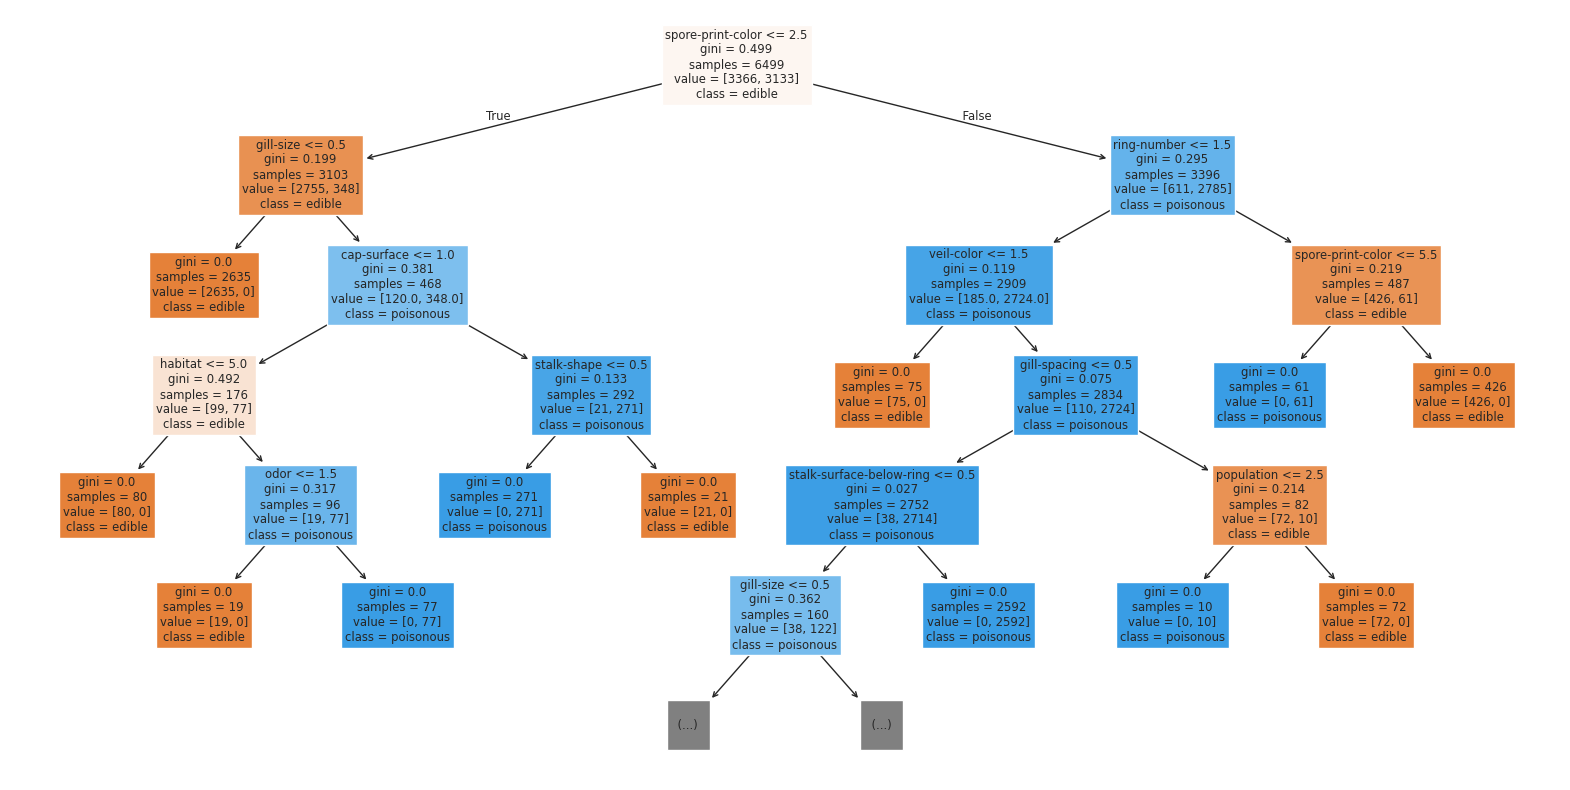

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, max_depth=5, feature_names=X.columns, class_names=["edible", "poisonous"])
plt.show()